In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os


2025-10-26 13:32:46.651553: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761485566.850933      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761485566.906606      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import os

base_dir = '/kaggle/input/cat-and-dog'

train_dir = os.path.join(base_dir, 'training_set/training_set')
test_dir = os.path.join(base_dir, 'test_set/test_set')


print("Training directory:", train_dir)
print("Testing directory:", test_dir)


Training directory: /kaggle/input/cat-and-dog/training_set/training_set
Testing directory: /kaggle/input/cat-and-dog/test_set/test_set


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data preprocessing and augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Only rescaling for testing (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training and testing datasets
train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)




Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [4]:
# Step 3: Building the CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Initialize the CNN
cnn = Sequential()

# 1️⃣ Convolution + Pooling Layer 1
cnn.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)))
cnn.add(MaxPooling2D(pool_size=(2,2)))

# 2️⃣ Convolution + Pooling Layer 2
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

# 3️⃣ Convolution + Pooling Layer 3
cnn.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the layers
cnn.add(Flatten())

# 4️⃣ Fully connected (Dense) layer
cnn.add(Dense(units=128, activation='relu'))

# 5️⃣ Dropout to reduce overfitting
cnn.add(Dropout(0.5))

# 6️⃣ Output layer (binary classification: cat vs dog)
cnn.add(Dense(units=1, activation='sigmoid'))

# Compile the model
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
cnn.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1761485590.442672      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1761485590.443376      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Step 4: Train the CNN
history = cnn.fit(
    train_set,
    validation_data=test_set,
    epochs=10,           # You can increase this later to improve accuracy
    steps_per_epoch=len(train_set),
    validation_steps=len(test_set)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1761485595.178292      74 service.cc:148] XLA service 0x7b065c0056c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761485595.179146      74 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1761485595.179167      74 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1761485595.553855      74 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/251 ━━━━━━━━━━━━━━━━━━━━ 28:13 7s/step - accuracy: 0.5625 - loss: 0.7041

I0000 00:00:1761485599.273595      74 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


251/251 ━━━━━━━━━━━━━━━━━━━━ 97s 360ms/step - accuracy: 0.5266 - loss: 0.6979 - val_accuracy: 0.6189 - val_loss: 0.6614
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 56s 225ms/step - accuracy: 0.6228 - loss: 0.6524 - val_accuracy: 0.7128 - val_loss: 0.5641
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 57s 229ms/step - accuracy: 0.6764 - loss: 0.5985 - val_accuracy: 0.6836 - val_loss: 0.6099
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 56s 223ms/step - accuracy: 0.7023 - loss: 0.5628 - val_accuracy: 0.7326 - val_loss: 0.5271
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 56s 222ms/step - accuracy: 0.7215 - loss: 0.5383 - val_accuracy: 0.7281 - val_loss: 0.5775
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 57s 228ms/step - accuracy: 0.7244 - loss: 0.5456 - val_accuracy: 0.7533 - val_loss: 0.5182
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 58s 230ms/step - accuracy: 0.7479 - loss: 0.5027 - val_accuracy: 0.7751 - val_loss: 0.4739
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 57s 229ms/step - accuracy: 0.7669 - loss: 0.4826 - val

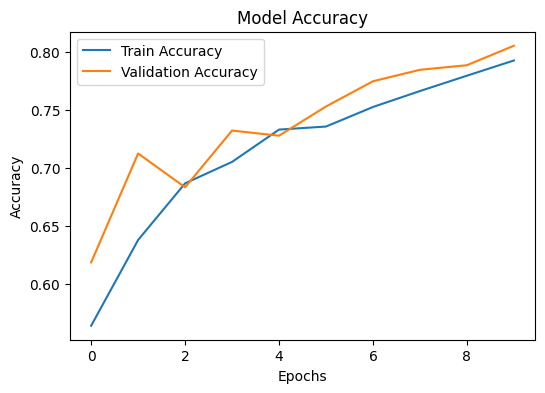

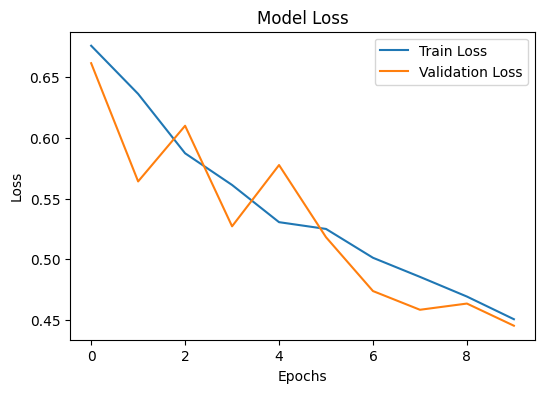

In [6]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [8]:
def predict_image(path):
    # Load the image and resize to the same size used in training
    img = image.load_img(path, target_size=(150,150))
    
    # Convert to array
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)   # Add batch dimension
    x = x / 255.0                   # Normalize (same as training)
    
    # Predict using your trained model
    prediction = cnn.predict(x)
    
    # Return label
    if prediction[0][0] > 0.5:
        print("🐶 It's a **Dog!**")
    else:
        print("🐱 It's a **Cat!**")

In [9]:
import os

# Check the folders inside your test_set directory
test_dir = '/kaggle/input/cat-and-dog/test_set'
print("📁 Folders inside test_set:", os.listdir(test_dir))

📁 Folders inside test_set: ['test_set']


In [10]:
import os

# Check what’s inside the nested test_set
nested_test_dir = '/kaggle/input/cat-and-dog/test_set/test_set'
print("📁 Folders inside nested test_set:", os.listdir(nested_test_dir))

📁 Folders inside nested test_set: ['dogs', 'cats']


In [11]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(path):
    img = image.load_img(path, target_size=(150,150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.0
    prediction = cnn.predict(x)
    return "Dog 🐶" if prediction[0][0] > 0.5 else "Cat 🐱"

In [12]:
print(predict_image('/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4001.jpg'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step
Dog 🐶


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


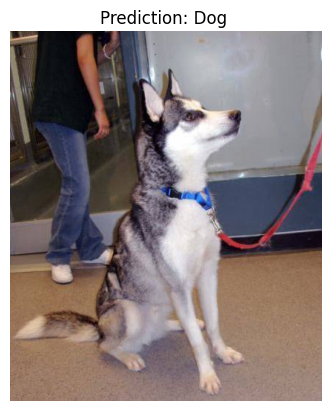

In [13]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

def show_prediction(img_path):
    img = image.load_img(img_path, target_size=(150,150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.0

    prediction = cnn.predict(x)
    label = "Dog " if prediction[0][0] > 0.5 else "Cat "

    plt.imshow(image.load_img(img_path))
    plt.title(f"Prediction: {label}")
    plt.axis("off")
    plt.show()

# Example:
show_prediction('/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4001.jpg')

In [14]:
# Save the trained model
cnn.save("cat_dog_cnn_model.h5")

print("✅ Model saved successfully as cat_dog_cnn_model.h5")


✅ Model saved successfully as cat_dog_cnn_model.h5


In [15]:
import os
print(os.listdir())


['__notebook__.ipynb', 'cat_dog_cnn_model.h5']
